In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#fix rando, seed for reproductibility
numpy.random.seed(7)
#load dataset
dataframe=pandas.read_csv('international-airline-passengers.csv',usecols=[1],engine='python',skipfooter=3)
dataset=dataframe.values
dataset=dataset.astype('float32')

In [8]:
#split into train and testsets
train_size=int(len(dataset)*0.67)
test_size=len(dataset)-train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [15]:
#convert an array of values into a dataset matrix
def create_dataset(dataset,look_back=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[(i+look_back),0])
    return numpy.array(dataX),numpy.array(dataY)
#reshape into X=t and Y=t+1
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)


In [16]:
#create and fit MLP
model=Sequential()
model.add(Dense(8,input_dim=look_back,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,nb_epoch=200,batch_size=2,verbose=2)

Epoch 1/200
0s - loss: 45847.1971
Epoch 2/200
0s - loss: 34864.5374
Epoch 3/200
0s - loss: 26648.3392
Epoch 4/200
0s - loss: 19904.9384
Epoch 5/200
0s - loss: 14022.7143
Epoch 6/200
0s - loss: 9377.2007
Epoch 7/200
0s - loss: 5893.3278
Epoch 8/200
0s - loss: 3533.1164
Epoch 9/200
0s - loss: 2056.3458
Epoch 10/200
0s - loss: 1245.1910
Epoch 11/200
0s - loss: 840.4912
Epoch 12/200
0s - loss: 650.1716
Epoch 13/200
0s - loss: 576.7537
Epoch 14/200
0s - loss: 548.6132
Epoch 15/200
0s - loss: 540.3413
Epoch 16/200
0s - loss: 538.5079
Epoch 17/200
0s - loss: 538.6462
Epoch 18/200
0s - loss: 537.4607
Epoch 19/200
0s - loss: 541.5321
Epoch 20/200
0s - loss: 538.5870
Epoch 21/200
0s - loss: 540.8462
Epoch 22/200
0s - loss: 538.4422
Epoch 23/200
0s - loss: 541.0889
Epoch 24/200
0s - loss: 537.0187
Epoch 25/200
0s - loss: 537.8854
Epoch 26/200
0s - loss: 542.5550
Epoch 27/200
0s - loss: 543.2367
Epoch 28/200
0s - loss: 536.6357
Epoch 29/200
0s - loss: 547.9231
Epoch 30/200
0s - loss: 544.5947
Epoc

In [19]:
#Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, numpy.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, numpy.sqrt(testScore)))

Train Score: 531.45 MSE (23.05 RMSE)
Test Score: 2353.35 MSE (48.51 RMSE)


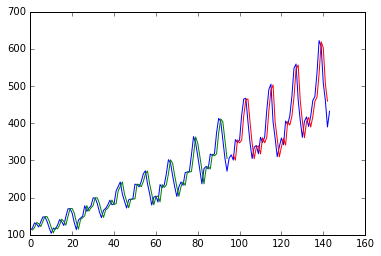

In [21]:
%matplotlib inline
#generate preditions for training
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

#shofy train predictions for plotting
trainPredictPlot=numpy.empty_like(dataset)
trainPredictPlot[:,:]=numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


#plot baseline predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
